<a href="https://colab.research.google.com/github/Nadia-Chen/RC-GNN/blob/main/RC2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install reservoirpy==0.3.0

In [ ]:
!pip install matplotlib

In [ ]:
from google.colab import files 

In [ ]:
uploaded = files.upload()

In [ ]:
import numpy as np
import pandas as pd
from reservoirpy.nodes import Reservoir, Ridge
from reservoirpy.observables import rmse, rsquare
import matplotlib.pyplot as plt

# 导入数据
data = pd.read_csv("/content/drive/MyDrive/wind_speed.csv")
# 数据处理
data = data.dropna(axis=0, how='any')
data = data.round(2)
data = data.drop(['datetime'], axis = 1)
data = ((data-data.mean())/data.std())
data = np.array(data)
# 数据集
def create_dataset(dataset, look_back):
  # 数据处理
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back),:]
        dataX.append(a)
        dataY.append(dataset[i + look_back,:])
    TrainX = np.array(dataX)
    Train_Y = np.array(dataY)

    return TrainX, Train_Y

INPUT_DIMS = 36
TIME_STEPS = 1

train_X, _ = create_dataset(data,TIME_STEPS) 

# 训练数据
reservoir = Reservoir(units=100, lr=0.3, sr=1.25)
readout = Ridge(output_dim=36, ridge=1e-5)
esn = reservoir >> readout
# 预测结果
predictions = esn.fit(train_X[:5000,:], train_X[1:5001,:]).run(train_X[5001:10000,:])

# 模型评价
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100


In [ ]:
print(predictions.shape)

(4999, 36)


In [ ]:
print("RMSE:", rmse(train_X[5001:10000,:], predictions.round(2)))
# print("MAPE:", mape(train_X[5001:10000,:], predictions.round(2)))

RMSE: 1.0717660686024046


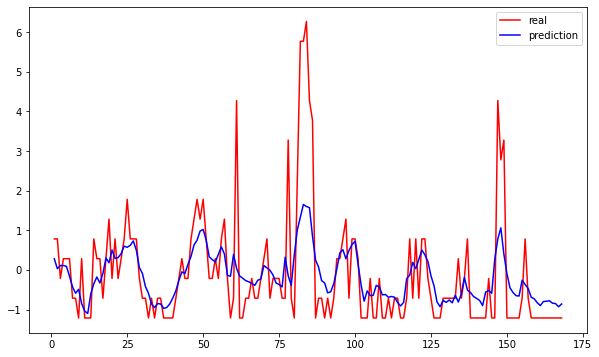

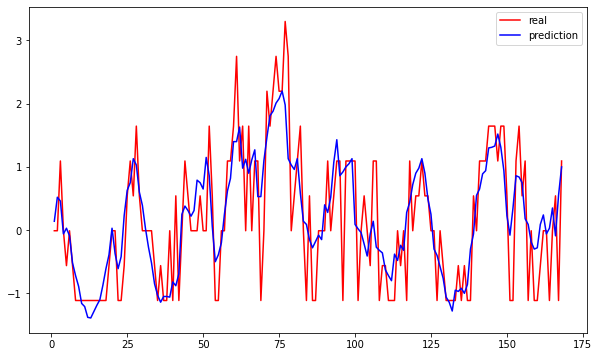

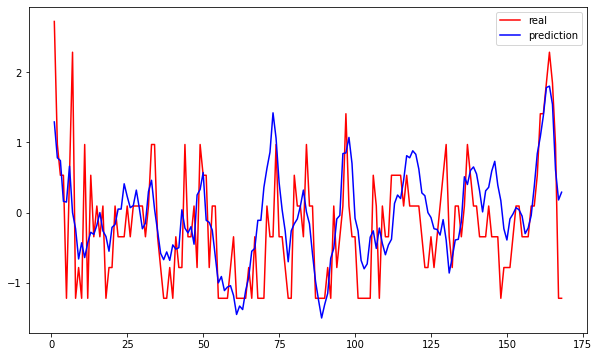

In [ ]:
# 绘图
for i in range(0,3):
    # 1 
    y1 = train_X[5001:5169,0,i].tolist()
    y2 = predictions[1:169,i].round(2).tolist()
    # 2
    # y1 = train_X[9832:10000,0,i].tolist()
    # y2 = predictions[-169:-1,i].round(2).tolist()
    # 3 
    # y1 = train_X[5170:5338,0,i].tolist()
    # y2 = predictions[170:338,i].round(2).tolist()
    # 4
    # y1 = train_X[5001:10000,0,0].tolist()
    # y2 = predictions[:,0].round(2).tolist()
    # x=np.arange(1,5000)

    # y1 = train_X[9501:9669,0,0].tolist()
    # y2 = predictions[4501:4669,0].round(2).tolist()
    x=np.arange(1,169)

    plt.figure(figsize=(10, 6)) #6，8分别对应宽和高
    plt.plot(x,y1,'r-',label='real')
    plt.plot(x,y2,'b-',label='prediction')

    plt.savefig('/content/drive/MyDrive/fig/fig_wind_speed_'+ str(i) +'.jpg')
    plt.legend(loc=1)
    plt.show()

In [ ]:
import numpy as np
import pandas as pd
data = pd.read_csv("/content/drive/MyDrive/temperature.csv")
print(data)

In [ ]:
data = data.dropna(axis=0, how='any')
data = data.round(2)
print(data)
print(data.shape)

In [ ]:
data = data.drop(['datetime'], axis = 1)

In [ ]:
print(data.shape) #(44430, 36)

(44430, 36)


In [ ]:
print(data.std())

In [ ]:
data = ((data-data.mean())/data.std())
print(data)

In [ ]:
data = np.array(data)
def create_dataset(dataset, look_back):
  # 数据处理
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back),:]
        dataX.append(a)
        dataY.append(dataset[i + look_back,:])
    TrainX = np.array(dataX)
    Train_Y = np.array(dataY)

    return TrainX, Train_Y
  
# temp_data = data[:,0].reshape(len(data),1)

INPUT_DIMS = 36
TIME_STEPS = 1

train_X, _ = create_dataset(data,TIME_STEPS)
# _ , train_Y = create_dataset(temp_data,TIME_STEPS)  
print(train_X,train_X.shape) #(44086, 1, 5)
# print(train_Y,train_Y.shape) #(44086, 1)

In [ ]:
from reservoirpy.nodes import Reservoir, Ridge

reservoir = Reservoir(units=100, lr=0.3, sr=1.25)
readout = Ridge(output_dim=36, ridge=1e-5)

In [ ]:
esn = reservoir >> readout

In [ ]:
predictions = esn.fit(train_X[:5000,:], train_X[1:5001,:]).run(train_X[5001:10000,:])

In [ ]:
predictions = esn.fit(train_X[:35542,:], train_X[1:35543,:]).run(train_X[35543:-1,:])

In [ ]:
from reservoirpy.observables import rmse, rsquare

In [ ]:
print(predictions.round(2))
print(predictions.round(2).shape)

[[ 0.12  0.73 -1.22 ...  0.25  0.17  0.86]
 [-0.1   0.46 -1.43 ...  0.46  0.41  1.32]
 [-0.2   0.3  -1.53 ...  0.57  0.51  1.57]
 ...
 [-0.82 -0.31  0.24 ... -1.   -0.86 -1.08]
 [-0.82 -0.26  0.21 ... -0.96 -0.78 -1.04]
 [-0.88 -0.3   0.16 ... -0.85 -0.65 -0.93]]
(4999, 36)


In [ ]:
print(train_X[5001:10000,:])
print(train_X[5001:10000,:].shape)

[[[ 0.29627498  0.64705089 -0.83590874 ...  0.21073233  0.1895277
    0.2628529 ]]

 [[ 0.27217299  0.45489227 -0.93154188 ...  0.60596506  0.79386013
    1.40467298]]

 [[ 0.19534787  0.22136618 -0.97654571 ...  0.60596506  0.46710821
    1.48220397]]

 ...

 [[-0.80488505  0.54563384  0.4917043  ... -0.73940716 -0.14039657
   -1.39067175]]

 [[-0.77475755  0.54563384  0.55545972 ... -0.73940716 -0.14039657
   -1.39067175]]

 [[-0.98715641  0.54563384  0.09979593 ... -0.73940716 -0.14039657
   -1.39067175]]]
(4999, 1, 36)


In [ ]:
print(train_X[35544:,:])

print(train_X[35544:,:].shape)

In [ ]:
print(predictions.round(2))
print(predictions.round(2).shape)

In [ ]:
print("RMSE:", rmse(train_X[5001:10000,:], predictions.round(2)))

RMSE: 1.0478565375983337


In [ ]:
# 数据太大 跑不动
print("RMSE:", rmse(train_X[35544:,:], predictions.round(2)),
      "R^2 score:", rsquare(train_X[35544:,:], predictions.round(2)))

In [ ]:
print(train_X[5001:10000,0,0].shape,
      # train_X[5001:10000,0,0].type,
      predictions[:,0].round(2).shape)
y1 = train_X[5001:10000,0,0].tolist()
y2 = predictions[:,0].round(2).tolist()
print(y1,y2)

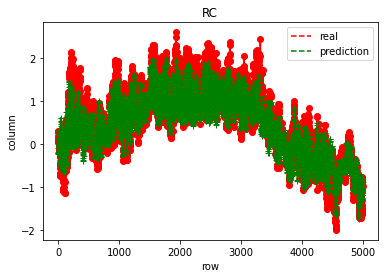

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x=np.arange(1,5000)
l1=plt.plot(x,y1,'r--',label='real')
l2=plt.plot(x,y2,'g--',label='prediction')

plt.plot(x,y1,'ro-',x,y2,'g+-')
plt.title('RC_temperature_Vancouver')
plt.xlabel('row')
plt.ylabel('column')
plt.legend()
plt.show()


In [ ]:
import numpy as np
import pandas as pd
data = pd.read_csv("/content/drive/MyDrive/humidity.csv")
print(data)

                  datetime  Vancouver  Portland  San Francisco  Seattle  \
0      2012-10-01 12:00:00        NaN       NaN            NaN      NaN   
1      2012-10-01 13:00:00       76.0      81.0           88.0     81.0   
2      2012-10-01 14:00:00       76.0      80.0           87.0     80.0   
3      2012-10-01 15:00:00       76.0      80.0           86.0     80.0   
4      2012-10-01 16:00:00       77.0      80.0           85.0     79.0   
...                    ...        ...       ...            ...      ...   
45248  2017-11-29 20:00:00        NaN      81.0            NaN     93.0   
45249  2017-11-29 21:00:00        NaN      71.0            NaN     87.0   
45250  2017-11-29 22:00:00        NaN      71.0            NaN     93.0   
45251  2017-11-29 23:00:00        NaN      71.0            NaN     87.0   
45252  2017-11-30 00:00:00        NaN      76.0            NaN     75.0   

       Los Angeles  San Diego  Las Vegas  Phoenix  Albuquerque  ...  \
0              NaN        Na

In [ ]:
data = data.dropna(axis=0, how='any')
data = data.round(2)
data = data.drop(['datetime'], axis = 1)
print(data)
print(data.shape)

       Vancouver  Portland  San Francisco  Seattle  Los Angeles  San Diego  \
1           76.0      81.0           88.0     81.0         88.0       82.0   
2           76.0      80.0           87.0     80.0         88.0       81.0   
3           76.0      80.0           86.0     80.0         88.0       81.0   
4           77.0      80.0           85.0     79.0         88.0       81.0   
5           78.0      79.0           84.0     79.0         88.0       80.0   
...          ...       ...            ...      ...          ...        ...   
44456       93.0      40.0           28.0     67.0         20.0       60.0   
44457       93.0      35.0           25.0     59.0         37.0       64.0   
44458       82.0      33.0           22.0     55.0         18.0       60.0   
44459       87.0      35.0           20.0     52.0         34.0       44.0   
44460       87.0      40.0           22.0     59.0         28.0       57.0   

       Las Vegas  Phoenix  Albuquerque  Denver  ...  Philadelph

In [ ]:
data = ((data-data.mean())/data.std())
print(data)

       Vancouver  Portland  San Francisco   Seattle  Los Angeles  San Diego  \
1      -0.450884  0.343941       0.585960  0.164080     1.152379   0.707854   
2      -0.450884  0.291900       0.528901  0.109647     1.152379   0.656295   
3      -0.450884  0.291900       0.471843  0.109647     1.152379   0.656295   
4      -0.381023  0.291900       0.414784  0.055215     1.152379   0.656295   
5      -0.311161  0.239858       0.357726  0.055215     1.152379   0.604735   
...          ...       ...            ...       ...          ...        ...   
44456   0.736764 -1.789764      -2.837553 -0.597977    -1.988158  -0.426449   
44457   0.736764 -2.049971      -3.008729 -1.033438    -1.203023  -0.220212   
44458  -0.031714 -2.154055      -3.179904 -1.251168    -2.080526  -0.426449   
44459   0.317594 -2.049971      -3.294021 -1.414466    -1.341576  -1.251396   
44460   0.317594 -1.789764      -3.179904 -1.033438    -1.618683  -0.581126   

       Las Vegas   Phoenix  Albuquerque    Denver  

In [ ]:
data = np.array(data)
def create_dataset(dataset, look_back):
  # 数据处理
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back),:]
        dataX.append(a)
        dataY.append(dataset[i + look_back,:])
    TrainX = np.array(dataX)
    Train_Y = np.array(dataY)

    return TrainX, Train_Y

INPUT_DIMS = 36
TIME_STEPS = 1

train_X, _ = create_dataset(data,TIME_STEPS)
print(train_X,train_X.shape) #(44086, 1, 5)

[[[-0.4508843   0.34394111  0.58595979 ... -1.25496708 -1.18354022
   -1.10157625]]

 [[-0.4508843   0.29189954  0.52890124 ... -1.25496708 -1.18354022
   -1.10157625]]

 [[-0.4508843   0.29189954  0.4718427  ... -1.25496708 -1.18354022
   -1.10157625]]

 ...

 [[ 0.73676351 -1.78976359 -2.83755301 ...  0.60122063  0.64219321
   -0.1314133 ]]

 [[ 0.73676351 -2.04997148 -3.00872865 ...  0.60122063  0.64219321
    0.08417847]]

 [[-0.03171448 -2.15405463 -3.17990429 ...  0.60122063  0.64219321
   -0.56259683]]] (36261, 1, 36)


In [ ]:
from reservoirpy.nodes import Reservoir, Ridge

reservoir = Reservoir(units=100, lr=0.3, sr=1.25)
readout = Ridge(output_dim=36, ridge=1e-5)
esn = reservoir >> readout

In [ ]:
predictions = esn.fit(train_X[:5000,:], train_X[1:5001,:]).run(train_X[5001:10000,:])

In [ ]:
from reservoirpy.observables import rmse, rsquare
print("RMSE:", rmse(train_X[5001:10000,:], predictions.round(2)))

RMSE: 1.197619072559497


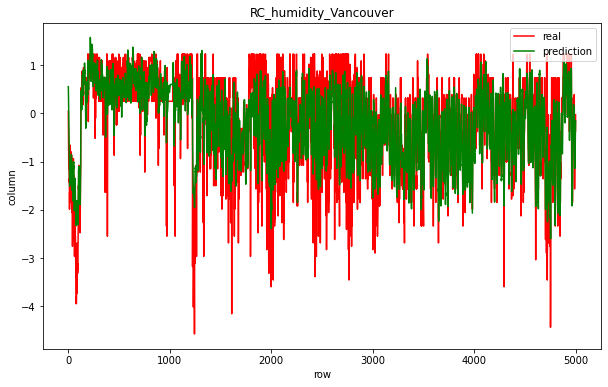

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

y1 = train_X[5001:10000,0,0].tolist()
y2 = predictions[:,0].round(2).tolist()

x=np.arange(1,5000)

plt.figure(figsize=(10, 6)) #6，8分别对应宽和高
plt.plot(x,y1,'r-',label='real')
plt.plot(x,y2,'g-',label='prediction')
plt.title('RC_humidity_Vancouver')
plt.xlabel('row')
plt.ylabel('column')
plt.legend(loc=1)
plt.show()